<H1>The Weighted Independent Domination Problem: Integer Linear Programming Models and Metaheuristic Approaches</H1>
<hr>

<h1>1-Generating instances</h1>

<pre><h2>Types of graphs:</h2>
<span style="font-weight:bold">-Random graphs</span>: Random graphs are mathematical models that represent networks with a random structure. In a random graph, the connections between nodes are determined randomly based on a certain probability distribution.
<span style="font-weight:bold">-Random geometric graph</span>: Random geometric graphs, on the other hand, are mathematical models that incorporate both randomness and geometric properties. In a random geometric graph, nodes are placed randomly in a geometric space (such as the Euclidean plane) and connected based on their proximity to each other.
Nodes:Graphs will made with           |v|={100,500,1000}
Rndomness:                             ep={0.05,0.15,0.25}
Radius:                                 r={0.14,0.24,0.34}
<h2>Assigning weights to nodes and edges:</h2>
<span style="font-weight:bold">-Scheme 1</span>: nodes and edges weights are consedered random from {0,...,100}
<span style="font-weight:bold">-Scheme 2</span>: nodes weights are consedered from {0,...,1000}and edges weights are consedered random from {0,...,10}
<span style="font-weight:bold">-Scheme 3</span>: nodes weights are consedered from {0,...,10}and edges weights are consedered random from {0,...,1000}
</pre>

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import *
import time
import csv

defining Random graph generator function:

In [3]:
def generate_random_graph(num_nodes, edge_probability):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for u in range(num_nodes):
        for v in range(u+1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(u, v)
    return G

defining Random geometric graph generator function:

In [4]:
def generate_random_geometric_graph(num_nodes, radius):
    G = nx.Graph()
    coordinates = {node: (random.random(), random.random()) for node in range(num_nodes)}
    G.add_nodes_from(range(num_nodes))
    for u in range(num_nodes):
        for v in range(u+1, num_nodes):
            dist = ((coordinates[u][0] - coordinates[v][0]) ** 2 + (coordinates[u][1] - coordinates[v][1]) ** 2) ** 0.5
            if dist <= radius:
                G.add_edge(u, v)
    return G


In [5]:
def generate_instances():
    graph_types = ['RG', 'RGG']
    num_nodes_list = [20, 45, 60]
    edge_probabilities = [0.05, 0.15, 0.25]
    radii = [0.14, 0.24, 0.34]
    weight_schemes = [
        ("Neutral", lambda: random.randint(0, 100), lambda: random.randint(0, 100)),
        ("Node-Oriented", lambda: random.randint(0, 1000), lambda: random.randint(0, 10)),
        ("Edge-Oriented", lambda: random.randint(0, 10), lambda: random.randint(0, 1000))
    ]
    instances = []
    for graph_type in graph_types:
        for num_nodes in num_nodes_list:
            if graph_type == 'RG':
                for ep in edge_probabilities:
                    for weight_scheme in weight_schemes:
                        for _ in range(4):
                            instance = {'graph_type': graph_type, 'num_nodes': num_nodes, 'edge_probability': ep}
                            instance['graph'] = generate_random_graph(num_nodes, ep)
                            instance['weight_scheme'] = weight_scheme[0]
                            instance['node_weights'] = [weight_scheme[1]() for _ in range(num_nodes)]
                            instance['edge_weights'] = [weight_scheme[2]() for _ in range(len(instance['graph'].edges()))]
                            instances.append(instance)
            elif graph_type == 'RGG':
                for radius in radii:
                    for weight_scheme in weight_schemes:
                        for _ in range(4):
                            instance = {'graph_type': graph_type, 'num_nodes': num_nodes, 'radius': radius}
                            instance['graph'] = generate_random_geometric_graph(num_nodes, radius)
                            instance['weight_scheme'] = weight_scheme[0]
                            instance['node_weights'] = [weight_scheme[1]() for _ in range(num_nodes)]
                            instance['edge_weights'] = [weight_scheme[2]() for _ in range(len(instance['graph'].edges()))]
                            instances.append(instance)

    return instances
instances = generate_instances()
print(len(instances))

216


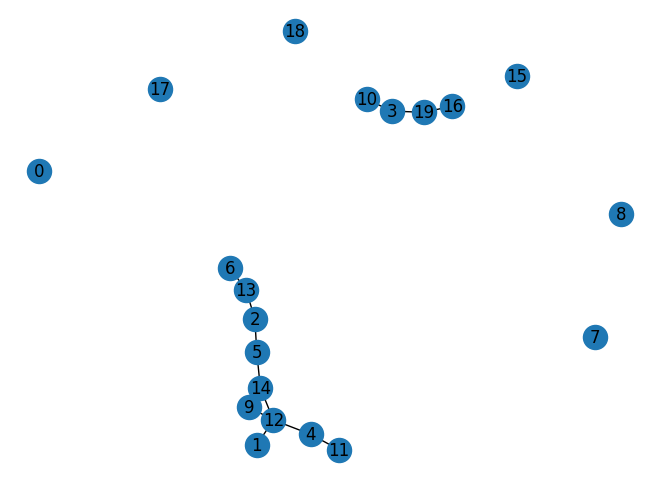

In [6]:
import matplotlib.pyplot as plt
instance1 = instances[1]
graph = instance1['graph']
nx.draw(graph, with_labels=True)
plt.show()

In [7]:
instance1

{'graph_type': 'RG',
 'num_nodes': 20,
 'edge_probability': 0.05,
 'graph': <networkx.classes.graph.Graph at 0x198e87622d0>,
 'weight_scheme': 'Neutral',
 'node_weights': [75,
  88,
  45,
  95,
  43,
  47,
  13,
  56,
  90,
  67,
  53,
  50,
  72,
  70,
  17,
  50,
  80,
  8,
  58,
  76],
 'edge_weights': [63, 34, 26, 43, 22, 83, 94, 89, 86, 32, 39, 81, 8]}

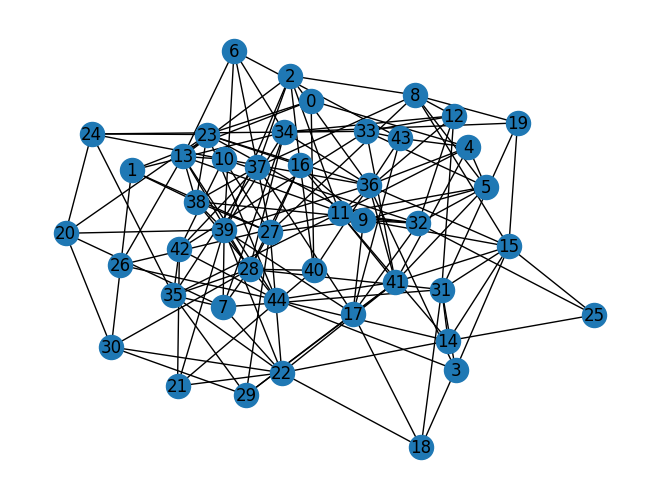

In [8]:
instance50 = instances[50]
graph = instance50['graph']
nx.draw(graph, with_labels=True)
plt.show()

In [9]:
instance50
edge_weights=instance50['edge_weights']
edge_weights

[48,
 38,
 33,
 42,
 26,
 91,
 71,
 0,
 68,
 58,
 15,
 48,
 48,
 25,
 76,
 38,
 0,
 30,
 68,
 25,
 45,
 71,
 91,
 45,
 64,
 87,
 59,
 21,
 65,
 98,
 27,
 31,
 51,
 79,
 15,
 20,
 2,
 65,
 26,
 71,
 52,
 50,
 25,
 100,
 83,
 65,
 12,
 39,
 59,
 83,
 46,
 96,
 23,
 51,
 93,
 80,
 67,
 43,
 11,
 41,
 100,
 7,
 89,
 11,
 84,
 3,
 92,
 2,
 57,
 43,
 80,
 72,
 78,
 44,
 90,
 33,
 25,
 67,
 11,
 72,
 46,
 71,
 21,
 53,
 4,
 21,
 91,
 12,
 91,
 94,
 0,
 42,
 73,
 73,
 40,
 95,
 32,
 27,
 48,
 56,
 60,
 85,
 6,
 98,
 76,
 86,
 89,
 69,
 72,
 93,
 66,
 95,
 99,
 15,
 74,
 35,
 47,
 10,
 38,
 45,
 5,
 29,
 91,
 14,
 54,
 72,
 25,
 81,
 13,
 18,
 6,
 41,
 93,
 38,
 30,
 44,
 99,
 14,
 22,
 2,
 18,
 5,
 56,
 78,
 48,
 22,
 81,
 47,
 69,
 5,
 72,
 44,
 12,
 70]

In [10]:
# instance215 = instances[215]
# graph = instance215['graph']
# nx.draw(graph, with_labels=True)
# plt.show()

<h1>2-Methods</h1>
<p>
    <ul>
        <li>ILP-1</li>
        <li>ILP-2</li>
        <li>ILP-3</li>
        <li>Greedy-1</li>
        <li>Greedy-2</li>
        <li>PBIG</li>
        <li>CMSA-PBIG</li>
    </ul>
</p>

<hr>
<h2 style="text-align:center">ILP-1</h2>
<p>The first one of the proposed ILP models—henceforth called ILP-1—uses three sets of binary variables. For each node v ∈ V it uses a binary variable xv. Moreover, for each edge e ∈ E the model uses a binary variable ye and a binary variable ze. Hereby, xv indicates if v is chosen for the solution. Moreover, ze indicates if e ∈ E is selected for connecting a non-chosen node to a chosen one. Variable ye is an indicator variable, which indicates if e is choosable, or not.</p>

<img src='ILP1.PNG'></img>

In [11]:
def solve_ILP1(graph, node_weights, edge_weights):
    model = gp.Model("ILP1")

    # Variables
    V = graph.nodes
    E = graph.edges

    xv = model.addVars(V, vtype=GRB.BINARY, name="xv")
    ye = model.addVars(E, vtype=GRB.BINARY, name="ye")
    ze = model.addVars(E, vtype=GRB.BINARY, name="ze")

    # Objective function
    obj = LinExpr()
    for v in V:
        obj += xv[v] * node_weights[v]
    for e, (u, v) in enumerate(E):
        obj += ze[u, v] * edge_weights[e]
    model.setObjective(obj, GRB.MINIMIZE)

    # Constraints
    for (u, v) in graph.edges:
        model.addConstr(xv[u] + xv[v] <= 1, f"edge_{u}_{v}")#3

    for v in V:
        model.addConstr(xv[v] + gp.quicksum(xv[u] for u in graph.neighbors(v)) >= 1, f"node_{v}")#4

    for (u, v) in graph.edges:
        model.addConstr(xv[u] + xv[v] == ye[u, v], f"edge_node_{u}_{v}")#5

    for e, (u, v) in enumerate(E):
        model.addConstr(ze[u, v] <= ye[u, v], f"ze_indicator_{u}_{v}")#6
    for v in V:
        model.addConstr(xv[v] + sum(ze[u, v] for u, vertex in E if vertex == v) >= 1)#7

        # Solve the model
    model.optimize()
    
    solution_value = None
    
    if model.status == GRB.OPTIMAL:
        solution = {}
        for v in V:
            solution[v] = xv[v].x
        for e, (u, v) in enumerate(E):
            solution[(u, v)] = ze[u, v].x
        solution_value = model.objVal
        return solution, solution_value
    else:
        print("No solution found.")
        return None, solution_value

<hr>
<h2 style="text-align:center">ILP-2</h2>
<p>The second ILP model—henceforth called ILP-2—follows the same idea as ILP-1, apart from the fact that it does not require the set of indicator variables. That is, model ILP-2 only makes use of binary variables xv for all v ∈ V and binary variables ze for all e ∈ E. The meaning of these variables is described above.</p>
<img src='ILP2.PNG'></img>

In [12]:
def ILP2(graph, w_v, w_e):
    V = list(graph.nodes)
    E = list(graph.edges)

    model = gp.Model("ILP-2")

    # Create variables
    x = model.addVars(V, vtype=GRB.BINARY, name="x")  
    z = model.addVars(E, vtype=GRB.BINARY, name="z")

    # Set objective function
    obj = sum(w_v[v] * x[v] for v in V) + sum(w_e[e] * z[e] for e in E)
    model.setObjective(obj, GRB.MINIMIZE)

    # Add constraints
    for (u, v) in graph.edges:
        model.addConstr(x[u] + x[v] <= 1, f"edge_{u}_{v}")#9
    for u, v in E:
        model.addConstr(x[u] + x[v] >= z[u, v], f"constraint_1_{u}_{v}")#11
        model.addConstr((1 - x[u]) + (1 - x[v]) >= z[u, v], f"constraint_2_{u}_{v}")#12

    for v in V:
        model.addConstr(x[v] + sum(x[u] for u, vertex in E if vertex == v) >= 1, f"constraint_3_{v}")#10
        model.addConstr(x[v] + sum(z[u, v] for u, vertex in E if vertex == v) >= 1, f"constraint_4_{v}")#13

    # Optimize the model
    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        selected_nodes = [v for v in V if x[v].x > 0.5]
        selected_edges = [(u, v) for u, v in E if z[u, v].x > 0.5]
        objective_value = model.objVal  # Get the objective value from the model
        return selected_nodes, selected_edges, objective_value
    else:
        return None, None, None

<hr>
<h2 style="text-align:center">ILP-3</h2>
<p>The third ILP model—henceforth called ILP-3—is structurally different to ILP-1 and ILP-2. The main idea is to model the edge-weight contribution of each node in terms of an integer variable qv for all v ∈ V . Obviously, the edge-weight contribution of a selected node v ∈ V —that is, when xv = 1—must be zero, whereas the edge-weight 
contribution of a non-selected node v ∈ V must be equal to the weight of the minimu 
weight edge that connects this node to a selected node.
<mg>

<img src='ILP3.PNG'></img>

In [13]:
def solve_ILP3(graph, node_weights, edge_weights):
    model = Model("ILP3")

    # Variables
    V = graph.nodes
    E = graph.edges
    xv = model.addVars(V, vtype=GRB.BINARY, name="xv")

    # Convert edge_weights to a dictionary if it is a list
    if isinstance(edge_weights, list):
        edge_weights_dict = {(u, v): w for (u, v), w in zip(E, edge_weights)}
    else:
        edge_weights_dict = edge_weights

    if len(edge_weights_dict) != len(E):
        print("Error: The number of edge weights does not match the number of edges.")
        return None, None

    # Compute the lower and upper bounds for qv
    if isinstance(list(edge_weights_dict.values())[0], int):
        edge_weights_max = max(edge_weights_dict.values())
    else:
        edge_weights_max = max(max(row) for row in edge_weights_dict.values())

    qv = model.addVars(V, lb=0, ub=edge_weights_max, vtype=GRB.INTEGER, name="qv")#18

    # Objective function
    obj = LinExpr()
    for v in V:
        obj += node_weights[v] * xv[v]
        obj += qv[v]
    model.setObjective(obj, GRB.MAXIMIZE)

    # Constraints
    for (u, v) in graph.edges:
        model.addConstr(xv[u] + xv[v] <= 1, f"edge_{u}_{v}")  #15

    for v in V:
        model.addConstr(xv[v] + quicksum(xv[u] for u in graph.neighbors(v)) >= 1, f"node_{v}")  #16

    # M = edge_weights_max  # Constant M set to maximum weight of all edges

    for v in V:
        neighbors = list(graph.neighbors(v))
        if neighbors:
            min_edge_weight = min(edge_weights_dict.get((u, v), 0) for u in neighbors)
        else:
            min_edge_weight = 0  # Set default value if neighbors is empty
        model.addConstr(qv[v] == min_edge_weight, f"edge_contribution_ub_{v}")  # Constraints (19): Lower bound of edge weight

    return model, xv, qv

<hr>
<h2 style="text-align:center">Greedy Heuristic (GREEDY1)</h2>
<p>The first one of two different greedy heuristics developed in this work is a simple extension of a well-known heuristic for the minimum weight independent dominating set problem. Given an input graph G, this heuristic starts with an empty solution S = 0 and adds, at each step, exactly one node from the remaining graph G′ = (V ′, E′) to S. At each step, the node v ∈ V ′ that maximizes |N(v|G′)|/W(v) | is chosen to be added to S, where N(v | G′) refers to the neighborhood of v in G′.
</p>

In [14]:
def greedy1(graph):
    # Initialize the solution and remaining graph
    solution = set()
    remaining_graph = graph.copy()

    while remaining_graph:
        max_ratio = -1
        best_node = None
        nodes_to_remove = []

        for node in remaining_graph.nodes:
            neighborhood = set(remaining_graph.neighbors(node))
            if 'weight' in remaining_graph.nodes[node]:  # Check if 'weight' attribute is defined
                ratio = len(neighborhood) / remaining_graph.nodes[node]['weight']
            else:
                ratio = 0  # Assign a default ratio if 'weight' attribute is not defined

            if ratio > max_ratio:
                max_ratio = ratio
                best_node = node
            elif ratio == max_ratio:
                # Randomly resolve ties
                if random.random() < 0.5:
                    best_node = node

        solution.add(best_node)
        nodes_to_remove.append(best_node)
    # Remove the nodes outside the loop
    for node in nodes_to_remove:
        neighbors = list(remaining_graph.neighbors(node))
        remaining_graph.remove_nodes_from(neighbors)
        remaining_graph.remove_node(node)
    return solution

<hr>
<h2 style="text-align:center">Greedy Heuristic (GREEDY2)</h2>
<p>second greedy heuristic is designed to take into account the edge weights already during the process of constructing a solution. The algorithmic framework of this greedy heuristic—henceforth denoted by GREEDY2—is the same as the one of GREEDY1. However, the way in which a node is chosen at each step is different. For the description of this greedy heuristic the following notations are required. First, the maximum weight of any edge in E is denoted by wmax. Then, let S ∈ V be a partial solution, that is, S is an independent set which is not yet a dominating set, but which can be extended to be a dominating set. The auxiliary objective function 
value f aux(S) is defined asSigmav∈V c(v | S), where c(v | S) is called the contribution of node v with respect to partial solution S.
</p>

In [15]:
def greedy2(graph):
    # Initialize the solution and remaining graph
    solution = set()
    remaining_graph = graph.copy()

    # Calculate the maximum weight
    wmax = calculate_wmax(graph)

    while remaining_graph:
        max_ratio = -1
        best_node = None
        nodes_to_remove = []

        for node in remaining_graph.nodes:
            neighborhood = set(remaining_graph.neighbors(node))
            if 'weight' in remaining_graph.nodes[node]: 
                ratio = len(neighborhood) / remaining_graph.nodes[node]['weight']
            else:
                ratio = 0 

            if ratio > max_ratio:
                max_ratio = ratio
                best_node = node
            elif ratio == max_ratio:
                # Randomly resolve ties
                if random.random() < 0.5:
                    best_node = node

        solution.add(best_node)
        nodes_to_remove.append(best_node)


    for node in nodes_to_remove:
        neighbors = list(remaining_graph.neighbors(node))
        remaining_graph.remove_nodes_from(neighbors)
        remaining_graph.remove_node(node)

    return solution
def calculate_wmax(graph):
    if 'weight' in graph.edges[list(graph.edges)[0]]:
        return max(graph.edges[e]['weight'] for e in graph.edges)
    else:
        return 0 

# <h1>3-Numerical results</h1>

In [16]:
# instances = generate_instances()
# instance=instances[215]
# edge_index = 0
# instance

<h2>ILP1 emplementation</h2>

In [17]:
results = []
for instance in instances:
    graph = instance['graph']
    node_weights = instance['node_weights']
    edge_weights = instance['edge_weights']
    start_time = time.time()
    solution, objective_value = solve_ILP1(graph, node_weights, edge_weights)
    end_time = time.time()
    run_time = end_time - start_time
    if solution:
        result = {
            'Graph Type': instance['graph_type'],
            'Num Nodes': instance['num_nodes'],
            'Edge Probability' if instance['graph_type'] == 'RG' else 'Radius': instance['edge_probability'] if instance['graph_type'] == 'RG' else instance['radius'],
            'Weight Scheme': instance['weight_scheme'],
            'Solution': solution,
            'Run time': run_time,
            'Objective Function Value': objective_value 
        }
        results.append(result)

# Save results to CSV file
csv_filename = 'ilp1_results.csv'
fieldnames = ['Graph Type', 'Num Nodes', 'Edge Probability', 'Radius', 'Weight Scheme', 'Solution', 'Run time', 'Objective Function Value']

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for result in results:
        writer.writerow({
            'Graph Type': result['Graph Type'],
            'Num Nodes': result['Num Nodes'],
            'Edge Probability': result.get('Edge Probability', None),
            'Radius': result.get('Radius', None),
            'Weight Scheme': result['Weight Scheme'],
            'Solution': result['Solution'],
            'Run time': result['Run time'],
            'Objective Function Value': result['Objective Function Value']
        })
print(f"Results saved to {csv_filename}.")

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 58 rows, 32 columns and 100 nonzeros
Model fingerprint: 0xb3167c0e
Variable types: 0 continuous, 32 integer (32 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1106.0000000
Presolve removed 58 rows and 32 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 1106 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.106000000000e+03, best bo

<h2>ILP2 Emplementation</h2>

In [ ]:
def save_output_to_csv(filename, instances):
    fieldnames = ['Graph Type', 'Num Nodes', 'Edge Probability', 'Radius', 'Weight Scheme', 'Solution', 'Run time', 'Objective Function Value']
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for instance in instances:
            graph = instance['graph']
            w_v = dict(zip(graph.nodes, instance['node_weights']))
            w_e = dict(zip(graph.edges, instance['edge_weights']))
            solution = instance.get('selected_vertices', [])
            run_time = instance.get('run_time', 0.0)
            _,_,objective_value = ILP2(graph, w_v, w_e)
            instance['selected_vertices'] = solution
            # instance['objective_value'] = objective_value
            instance['run_time'] = run_time
            graph_type = instance['graph_type']
            
            num_nodes = instance['num_nodes']
            edge_probability = instance.get('edge_probability')
            radius = instance.get('radius')
            weight_scheme = instance['weight_scheme']

            row = {
                'Graph Type': graph_type,
                'Num Nodes': num_nodes,
                'Edge Probability': edge_probability,
                'Radius': radius,
                'Weight Scheme': weight_scheme,
                'Solution': solution,
                'Run time': run_time,
                'Objective Function Value': objective_value
            }

            writer.writerow(row)
# Example usage
for instance in instances:
    graph = instance['graph']
    w_v = dict(zip(graph.nodes, instance['node_weights']))
    w_e = dict(zip(graph.edges, instance['edge_weights']))
    start_time = time.time()
    solution = ILP2(graph, w_v, w_e)
    end_time = time.time()
    runtime = end_time - start_time
    instance['run_time'] = runtime
    print("Instance:", instance)
    print("Selected vertices:", solution)
    print()
filename = 'ilp2_results.csv'
save_output_to_csv(filename, instances)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 58 rows, 26 columns and 100 nonzeros
Model fingerprint: 0x5ee6b7bf
Variable types: 0 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 1135.0000000
Presolve removed 58 rows and 26 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 1106 1135 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.106000000000e+03, best bound 1.106000000000e+03, gap 0.0000%
Instance: {'graph_type': 'RG'

<h2>ILP3 Emplementation</h2>

In [ ]:
def solve_instances(instances):
    results = []

    for instance in instances:
        graph_type = instance['graph_type']
        num_nodes = instance['num_nodes']
        edge_probability = instance.get('edge_probability')
        radius = instance.get('radius')
        weight_scheme = instance['weight_scheme']
        node_weights = instance['node_weights']
        edge_weights = instance['edge_weights']

        # Solve ILP3 for the current instance
        model, xv, qv = solve_ILP3(instance['graph'], node_weights, edge_weights)
        start_time = time.time()
        model.optimize()
        end_time = time.time()
        run_time = end_time - start_time

        # Extract solution and objective value
        if model.status == GRB.OPTIMAL:
            solution = [v for v in xv.keys() if xv[v].x > 0.5]  # Nodes in the independent set
            objective_value = model.objVal
        else:
            solution = []
            objective_value = float('inf')

        # Store the results in a dictionary
        result = {
            'Graph Type': graph_type,
            'Num Nodes': num_nodes,
            'Edge Probability': edge_probability,
            'Radius': radius,
            'Weight Scheme': weight_scheme,
            'Solution': solution,
            'Run time': run_time,
            'Objective Function Value': objective_value
        }
        results.append(result)

    return results

# Solve instances and obtain results
results = solve_instances(instances)

# Save results to a CSV file
csv_file = 'ilp3_results.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Graph Type', 'Num Nodes', 'Edge Probability', 'Radius', 'Weight Scheme', 'Solution', 'Run time', 'Objective Function Value'])
    writer.writeheader()
    writer.writerows(results)

print(f"Results saved to {csv_file}.")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 46 rows, 40 columns and 64 nonzeros
Model fingerprint: 0x8d31b979
Variable types: 0 continuous, 40 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 9e+01]
  RHS range        [1e+00, 9e+01]
Found heuristic solution: objective 1197.0000000
Presolve removed 46 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 1202 1197 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.202000000000e+03, best bound 1.202000000000e+03, gap 0.0000%
Gurobi Optimizer version 11.0.

<h2>Greedy1 Emplementation</h2>

In [ ]:
# resultsGreedy1 = []

# for instance in instances:
#     start_time = time.time()
#     solution = greedy1(instance['graph'])
#     end_time = time.time()
#     run_time = end_time - start_time
#     result = {
#         'Instance': instance['name'],
#         'Independent Dominating Set': solution,
#         'Objective Function Value': calculate_objective(instance['graph'], solution),
#         'Run time': run_time
#     }
#     resultsGreedy1.append(result)

# # Save results to CSV file
# filename = 'greedy1_results.csv'
# fieldnames = ['Instance', 'Independent Dominating Set', 'Objective Function Value', 'Run time']
# with open(filename, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(resultsGreedy1)
# print("Results saved to", filename)

<h2>Greedy2 Emplementation</h2>

In [ ]:
# resultsGreedy2 = []
# for instance in instances:
#     start_time = time.time()
#     graph = instance['graph']
#     graph.graph['wmax'] = calculate_wmax(graph)
#     solution = greedy2(graph)
#     end_time = time.time()
#     run_time = end_time - start_time
#     result = {
#         'Instance': instance['name'],
#         'Independent Dominating Set': solution,
#         'Objective Function Value': calculate_objective(graph, solution),
#         'Run time': run_time
#     }
#     resultsGreedy2.append(result)

# # Save results to CSV file
# filename = 'greedy2_results.csv'
# fieldnames = ['Instance', 'Independent Dominating Set', 'Objective Function Value', 'Run time']

# with open(filename, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(resultsGreedy2)

# print("Results saved to", filename)